## 数理统计
在概率论的建模中，我们往往假设随机变量的分布已知，但是这个假设在实际中时很难做到的。

统计学能做的就是找到最佳的参数，如正态分布的$\mu$和$\sigma^2$，也会关心$\mu$和$\sigma^2$是否符合符合相关要求。

使用一个更通俗的例子来说，由于概率论的建模，现在假设中国人的身高近似服从正态分布，那究竟这个正态分布中的$\mu$和$\sigma^2$的值是多少就是统计学做的事情，而这个工作也叫做参数估计。

**一般认为，统计学是收集、分析、表述和解释数据的科学，统计学是一门处理数据的方法和技术的学科。**


### 1.总体和样本

### 2.经验分布函数与直方图

### 3.统计量与三大抽样分布

3.1 统计量

在统计学中，我们希望使用样本信息推断总体，而且样本也来源于总体，但是样本的信息较为分散，有时候还会显得杂乱无章。为了将这些信息分散的样本中有关总体的那部分信息汇集起来，从而反映总体的某些特征，需要对样本进行加工。

设 $x_{1}, x_{2}, \cdots, x_{n}$ 为取自某总体的样本， 若样本函数 $T=T\left(x_{1}, x_{2}, \cdots, x_{n}\right)$ 中**不含有任何未知参数**， 则称 $T$ 为统计量。统计量的分布称为抽样分布。

<div>
<img src="./images/14.svg" width="600" align="middle"/>
</div>

3.1.1 常用的统计量及其对应的抽样分布


样本均值

设 $x_{1}, x_{2}, \cdots, x_{n}$ 为取自某总体的样本， 其算术平均值称为样本均值，一 般用 $\bar{x}$ 表示，即
$$
\bar{x}=\frac{x_{1}+x_{2}+\cdots+x_{n}}{n}=\frac{1}{n} \sum_{i=1}^{n} x_{i} 
$$
如果把样本中的数据与样本均值的差称为偏差， 则样本所有偏差之和为 0， 即 $\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)=0$。

In [ ]:
# 从总体/总体的分布中抽取样本并计算样本均值和计算偏差
# 1.从总体中抽取样本
import numpy as np

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])  # 假设总体为X
x_i = np.random.choice(X, 10, replace=False)  # 从总体X中抽取10个样本
x_mean = np.mean(x_i)  # 计算样本均值
x_bias = np.sum(x_i - x_mean)  # 计算偏差和
print("样本均值为：", x_mean)
print("偏差和为：", round(x_bias, 0))

# 2.从总体分布中抽取样本，假设总体分布为N（0，1）
x_i = np.random.randn(10)  # 从总体分布N(0,1)中抽取10个样本
x_mean = np.mean(x_i)  # 计算样本均值
x_bias = np.sum(x_i - x_mean)  # 计算偏差和
print("样本均值为：", x_mean)
print("偏差和为：", round(x_bias, 0))


样本均值为： 10.7
偏差和为： 0.0
样本均值为： 0.025029912556483146
偏差和为： 0.0


样本均值的分布
   - （a）假设现在有20个数组成的总体；
   - （b）每次从总体中抽取5个样本，计算样本均值；
   - （c）重复b步骤10次，100次，1000次，10000次，100000次，观察不同重复次数的抽样的样本均值的分布情况。

从下面的实验可以看到，样本均值的分布，即样本均值的抽样分布当n越来越大时近似服从正态分布，具体来说：

设 $x_{1}, x_{2}, \cdots, x_{n}$ 是来自某个总体的样本， $\bar{x}$ 为样本均值。

（1）若总体分布为 $N\left(\mu, \sigma^{2}\right)$， 则 $\bar{x}$ 的精确分布为 $N\left(\mu, \sigma^{2} / n\right)$;

（2） 若总体分布未知或不是正态分布， $E(x)=\mu, \operatorname{Var}(x)=\sigma^{2}$ 存在， 则 $n$ 较大时 $\bar{x}$ 的渐近分布为 $N\left(\mu, \sigma^{2} / n\right)$。 

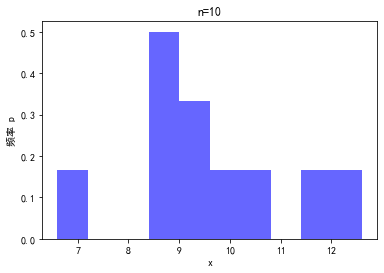

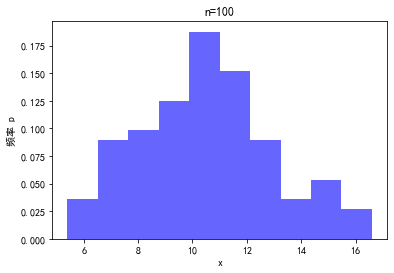

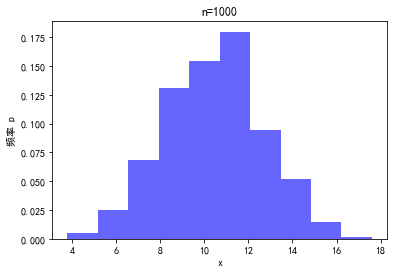

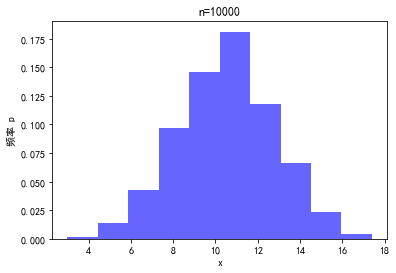

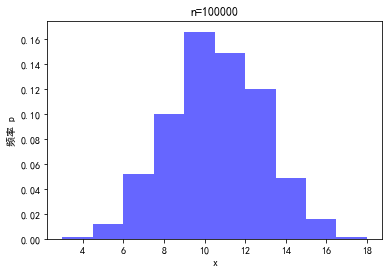

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def get_sample_dist(n, x):
    x_mean_list = []
    for i in range(n):
        x_i = np.random.choice(x, 5, replace=False)
        x_mean = np.mean(x_i)
        x_mean_list.append(x_mean)
    plt.hist(x_mean_list, color='blue', alpha=0.6, density=True)
    plt.xlabel("x")
    plt.ylabel("频率 p")
    plt.title("n=" + str(n))
    plt.show()


# 假设总体为x, size=20
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
get_sample_dist(10, x)
get_sample_dist(100, x)
get_sample_dist(1000, x)
get_sample_dist(10000, x)
get_sample_dist(100000, x)


样本方差与标准差

设 $x_{1}, x_{2}, \cdots, x_{n}$ 为取自某总体的样本，则它关于样本均值 $\bar{x}$ 的平均偏差平方和
$$
s_{n}^{2}=\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}
$$
称为样本方差。

样本标准差就是样本方差的算术平方根，即：$s_{n}=\sqrt{s_{n}^{2}}$。


In [ ]:
# 从总体/总体的分布中抽取样本并计算样本方差与样本标准差
# 1.从总体中抽取样本
import numpy as np

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])  # 假设总体为X
x_i = np.random.choice(X, 10, replace=False)  # 从总体X中抽取10个样本
x_sn2 = np.var(x_i, ddof=0)  # 样本方差
x_s2 = np.var(x_i, ddof=1)  # 无偏样本方差
x_sn = np.std(x_i, ddof=0)  # 样本标准差
x_s = np.std(x_i, ddof=1)  # 无偏样本标准差
print("样本方差sn^2为：", x_sn2)
print("样本方差s^2为：", x_s2)
print("样本标准差sn^2为：", x_sn)
print("样本标准差s^2为：", x_s)

# 2.从总体分布中抽取样本，假设总体分布为N（0，1）
x_i = np.random.randn(10)  # 从总体分布N(0,1)中抽取10个样本
x_sn2 = np.var(x_i, ddof=0)  # 样本方差
x_s2 = np.var(x_i, ddof=1)  # 无偏样本方差
x_sn = np.std(x_i, ddof=0)  # 样本标准差
x_s = np.std(x_i, ddof=1)  # 无偏样本标准差
print("样本方差sn^2为：", x_sn2)
print("样本方差s^2为：", x_s2)
print("样本标准差sn^2为：", x_sn)
print("样本标准差s^2为：", x_s)

样本方差sn^2为： 37.56
样本方差s^2为： 41.733333333333334
样本标准差sn^2为： 6.128621378417825
样本标准差s^2为： 6.460134157533676
样本方差sn^2为： 0.8720743080727834
样本方差s^2为： 0.9689714534142038
样本标准差sn^2为： 0.9338491891482176
样本标准差s^2为： 0.9843634762699213


样本方差与标准差的分布

样本方差/标准差的分布并没有像样本均值那样有完美的渐近分布，不同总体下的样本方差/样本标准差的分布都不一样

当总体服从正态分布条件下的与样本方差/样本标准差有关的分布，是三大抽样分布中的卡方分布。

设总体为 $X$ 方差存在， 即 $E(X)=\mu, \operatorname{Var}(X)=\sigma^{2}<\infty, x_{1}, x_{2}, \cdots, x_{n}$ 为 从该总体得到的样本， $\bar{x}$ 和 $s^{2}$ 分别是样本均值和样本方差, 则
$$
\begin{gathered}
E(\bar{x})=\mu, \quad \operatorname{Var}(\bar{x})=\sigma^{2} / n, \\
E\left(s^{2}\right)=\sigma^{2} .
\end{gathered}
$$
此定理表明， 样本均值的期望与总体均值相同， 而样本均值的方差是总体方差的 $1 / n$。

下面，我们使用一个实验来验证以上的观点：
   - （a）假设总体为$$X，为了方便起见，$X～N（0，1）$；
   - （b）对$X$抽取10个样本，计算10个样本的样本均值；
   - （c）重复（b）步骤10000次，计算这10000个样本均值的样本均值和样本方差；

In [ ]:
import numpy as np

x_mean_list = []
for i in range(10000):
    x_i = np.random.randn(10)
    x_mean_list.append(np.mean(x_i))
print("标准正态分布的均值和方差为：", 0, 1)
print("1000个样本均值的样本均值为：", np.mean(x_mean_list))
print("1000个样本均值的样本方差为：", np.var(x_mean_list, ddof=1))


标准正态分布的均值和方差为： 0 1
1000个样本均值的样本均值为： 0.002334870115043849
1000个样本均值的样本方差为： 0.09903671031585899


样本中位数与样本分位数

在概率论中，我们知道中位数是指累计概率$p=0.5$时对应的随机变量值$x$，而样本抽样后的一组离散个数的取值，因此，我们定义样本中位数只需要查找抽样后的样本中排在中间的那个样品，具体来说：
$$
m_{0.5}= \begin{cases}x\left(\frac{n+1}{2}\right), & n \text { 为奇数, } \\ \left.\frac{1}{2}\left(\frac{x}{2}\right)+x\left(\frac{n}{2}+1\right)\right), & n \text { 为偶数. }\end{cases}
$$
若 $n=5$， 则 $m_{0.5}=x_{(3)}$， 若 $n=6$, 则 $m_{0.5}=\frac{1}{2}\left(x_{(3)}+x_{(4)}\right)$。

样本 $p$ 分位数 $m_{p}$ 可如下定义:
$$
m_{p}= \begin{cases}x_{([n p+1])}, & \text { 若 } n p \text { 不是整数, } \\ \frac{1}{2}\left(x_{(n p)}+x_{(n p+1)}\right), & \text { 若 } n p \text { 是整数. }\end{cases}
$$
用普通的语言理解就是：先将抽样的$n$个样本按从小到大排序，样本$p$分位数就是排在第$n\times p$位的样品值，当然有可能$n\times p$不是整数，按上述公式处理。

样本分位数的抽样分布的渐近分布为正态分布

In [ ]:
# 从总体/总体的分布中抽取样本并计算样本样本中位数
# 1.从总体中抽取样本
import numpy as np

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])  # 假设总体为X
x_i = np.random.choice(X, 10, replace=False)  # 从总体X中抽取10个样本
x_mid = np.median(x_i)  # 计算样本中位数
print("样本中位数为：", x_mid)

# 2.从总体分布中抽取样本，假设总体分布为N（0，1）
x_i = np.random.randn(10)  # 从总体分布N(0,1)中抽取10个样本
x_mid = np.median(x_i)  # 计算样本中位数
print("样本中位数为：", x_mid)

样本中位数为： 7.5
样本中位数为： 0.12274926580988374


In [ ]:
# 从总体中抽取样本并计算样本样本分位数
import numpy as np

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])  # 假设总体为X
x_i = np.random.choice(X, 10, replace=False)  # 从总体X中抽取10个样本
x_low = np.percentile(x_i, 25)  # 计算样本下四分位数
x_high = np.percentile(x_i, 75)  # 计算样本上四分位数
print("样本下四分位数为：", x_low)
print("样本上四分位数为：", x_high)

样本下四分位数为： 4.25
样本上四分位数为： 13.5


（2）三大抽样分布：

以上关于统计量及其分布的介绍，我们已经学习了几种常用的统计量及其分布，包括：样本均值、样本方差/样本标准差以及分位数/中位数。在这些统计量的构造以及抽样分布的探索上，我们并没有对总体分布的形式进行限定，这是一件好事，也是一件不好的事，因为如果对总体的分布做限定，会得出特定条件下的统计量及其抽样分布，但是会降低使用的广泛性。实际上，有很多实际问题都是以标准正态分布的前提下讨论的，因此基于此，讨论以标准正态分布为总体而构造的统计量及其抽样分布具有广泛的应用。以标准正态分布为总体构造的三个著名统计量：卡方统计量、F统计量与t统计量在实际中有广泛的用途。下面，我们来一一学习！

- （2.1）卡方统计量与卡方分布：

假设$x_1,x_2,...x_n$是标准正态分布$N(0,1)$为总体抽样的得到的样本（$x_1,x_2,...x_n$独立同分布于$N(0,1)$），则
$$
\chi^{2}=x_{1}^{2}+x_{2}^{2}+\cdots+x_{n}^{2}
$$
的分布为自由度为n的$\chi^{2}$分布，简称$\chi^{2} \sim \chi^{2}(n)$，$\chi^{2}$分布的密度函数为：
$$
p(y)=\frac{(1 / 2)^{\frac{n}{2}}}{\Gamma(n / 2)} y^{\frac{n}{2}-1} \mathrm{e}^{-\frac{y}{2}}, \quad y>0
$$
**可以用一句话记住卡方分布：$n$个标准正态分布的平方和服从自由度为$n$的卡方分布**。

有同学可能会问，什么是自由度，这个概念不用深究，可以简单理解为可以自由变化的变量个数。有一个例子很好地阐述了自由度的概念：在无偏样本方差$s^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}$中，为什么分母是$n-1$而不是$n$呢？是因为在这个式子中只有$n-1$个可以自由变化的变量数，$n$个样本，其中在计算样本均值时需要花费一个方程，即$\bar{x}=\frac{x_{1}+x_{2}+\cdots+x_{n}}{n}$，因此样本方差就只剩下$n-1$个自由度了。


我们使用python画出不同自由度$n$下的密度函数图：

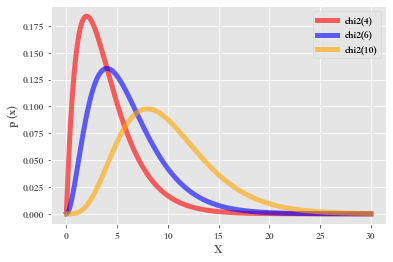

In [ ]:
# 使用scipy计算pdf画图(非自定义函数)
from scipy.stats import chi2
x = np.linspace(0.01,30,10000)  
plt.plot(x, chi2.pdf(x,df=4),'r-', lw=5, alpha=0.6, label='chi2(4)',c='red')
plt.plot(x, chi2.pdf(x,df=6),'r-', lw=5, alpha=0.6, label='chi2(6)',c='blue')
plt.plot(x, chi2.pdf(x,df=10),'r-', lw=5, alpha=0.6, label='chi2(10)',c='orange')
plt.xlabel("X")
plt.ylabel("p (x)")
plt.legend()
plt.show()

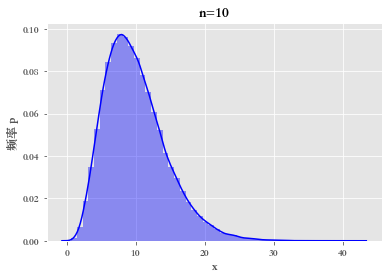

In [ ]:
# 使用卡方分布的定义演示卡方分布
from scipy.stats import norm
n = 10
chi2_list = []
for i in range(100000):
    x_i = norm.rvs(loc=0,scale=1,size=10)
    chi2_T = np.sum(np.square(x_i))
    chi2_list.append(chi2_T)
sns.distplot(chi2_list,color='blue')
plt.xlabel("x")
plt.ylabel("频率 p")
plt.title("n="+str(n))
plt.show()


该密度函数的图像是取非负值的偏态分布， 其数学期望等于自由度n， 方差等于 2 倍自由度即2n， 即 $E\left(\chi^{2}\right)=n, \operatorname{Var}\left(\chi^{2}\right)=2 n$。

为什么$\chi^{2}$分布很重要呢？我们在学习样本方差时，一直没有给出样本方差的抽样分布，是因为在不同的总体分布假设下，样本方差的抽样分布都是不一样的，而在正态分布总体假设下，样本方差经过变换可以与卡方分布产生关系，具体来说就是：

设 $x_{1}, x_{2}, \cdots, x_{n}$ 是来自正态总体 $N\left(\mu, \sigma^{2}\right)$ 的样本， 其样本均值和样本方差分别为
$$
\bar{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i} \text { 和 } s^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2},
$$
那么，$\frac{(n-1) s^{2}}{\sigma^{2}} \sim \chi^{2}(n-1)$。

我们使用python对这个结论进行验证：

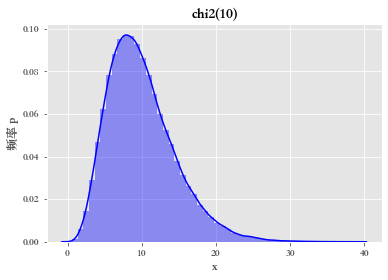

In [ ]:
# 假设总体为N（0，1），抽样的样本容量为n=11,抽样的次数为N
from scipy.stats import norm
def S2_Chi2(N):
    mu,sig = 0,1
    n = 11
    T_list = []
    for i in range(N):
        x_i = norm.rvs(loc=mu,scale=sig,size=n)  # 正态分布总体抽样
        T = (n-1)*np.var(x_i,ddof=1)/sig**2  # 构造卡方统计量
        T_list.append(T)
    sns.distplot(T_list,color='blue')
    plt.xlabel("x")
    plt.ylabel("频率 p")
    plt.title("chi2(10)")
    plt.show()

S2_Chi2(100000)




- （2.2）F统计量与F分布：

设随机变量 $X_{1} \sim \chi^{2}(m), X_{2} \sim \chi^{2}(n), X_{1}$ 与 $X_{2}$ 独立， 则称 $F=\frac{X_{1} / m}{X_{2} / n}$ 的分布是自由度为 $m$ 与 $n$ 的 $F$ 分布， 记为 $F \sim F(m, n)$， 其中 $m$ 称为分子自由度， $n$ 称为分母自由度。F分布的密度函数为：
$$
\begin{aligned}
p_{F}(y) &=\frac{\Gamma\left(\frac{m+n}{2}\right)\left(\frac{m}{n}\right)^{\frac{m}{2}} y^{\frac{m}{2}-1}\left(1+\frac{m}{n} y\right)^{-\frac{m+n}{2}}}{\Gamma\left(\frac{m}{2}\right) \Gamma\left(\frac{n}{2}\right)} \cdot
\end{aligned}
$$

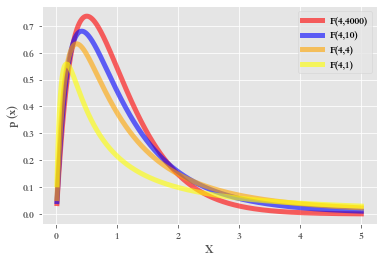

In [ ]:
# 使用scipy与matplotlib绘制不同的m，n下的F分布的密度函数
from scipy.stats import f
x = np.linspace(0.01,5,10000)  
plt.plot(x, f.pdf(x,4,4000),'r-', lw=5, alpha=0.6, label='F(4,4000)',c='red')
plt.plot(x, f.pdf(x,4,10),'r-', lw=5, alpha=0.6, label='F(4,10)',c='blue')
plt.plot(x, f.pdf(x,4,4),'r-', lw=5, alpha=0.6, label='F(4,4)',c='orange')
plt.plot(x, f.pdf(x,4,1),'r-', lw=5, alpha=0.6, label='F(4,1)',c='yellow')
plt.xlabel("X")
plt.ylabel("p (x)")
plt.legend()
plt.show()

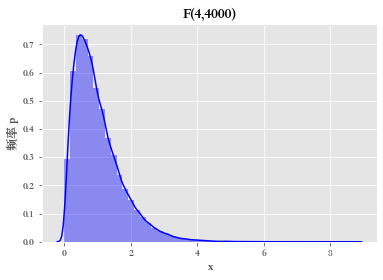

In [ ]:
# 使用F统计量的定义演示：
from scipy.stats import norm
m,n = 4,4000
F_list = []
for i in range(100000):
    chi2_m_sample = np.sum(np.square(norm.rvs(loc=0,scale=1,size=m))) # 卡方m统计量
    chi2_n_sample = np.sum(np.square(norm.rvs(loc=0,scale=1,size=n))) # 卡方n统计量
    F_T = (chi2_m_sample/m) / (chi2_n_sample/n)  # # F（m，n）统计量
    F_list.append(F_T)
sns.distplot(F_list,color='blue')
plt.xlabel("x")
plt.ylabel("频率 p")
plt.title("F(4,4000)")
plt.show()

F分布的密度函数的图像是一个只取非负值的偏态分布。接下来，我们来看看之前学过的样本均值和样本方差与F分布的联系：

设 $x_{1}, x_{2}, \cdots, x_{m}$ 是来自 $N\left(\mu_{1}, \sigma_{1}^{2}\right)$ 的样本， $y_{1}, y_{2}, \cdots, y_{n}$ 是来自 $N\left(\mu_{2}, \sigma_{2}^{2}\right)$ 的样本， 且此两样本相互独立， 记：
$$
s_{x}^{2}=\frac{1}{m-1} \sum_{i=1}^{m}\left(x_{i}-\bar{x}\right)^{2}, \quad s_{y}^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2},
$$
其中
$$
\bar{x}=\frac{1}{m} \sum_{i=1}^{m} x_{i}, \quad \bar{y}=\frac{1}{n} \sum_{i=1}^{n} y_{i},
$$
则有
$$
F=\frac{s_{x}^{2} / \sigma_{1}^{2}}{s_{y}^{2} / \sigma_{2}^{2}} \sim F(m-1, n-1) 
$$
特别， 若 $\sigma_{1}^{2}=\sigma_{2}^{2}$， 则 $F=s_{x}^{2} / s_{y}^{2} \sim F(m-1, n-1)$。

下面，我们使用python模拟这个定理：

In [ ]:
# x1,x2,...,xn ~ N(0,1), y1,y2,...,yn ~ N(0,4)
# from scipy.stats import norm
# F_list = []
# for i in range(100):
#     x_mu, x_sigma2 = 0, 1
#     y_mu, y_sigma2 = 0, 4
#     norm_xi = norm.rvs(loc=x_mu,scale=x_sigma2,size=5)
#     norm_yi = norm.rvs(loc=y_mu,scale=y_sigma2,size=5)
#     sx_2 = np.var(norm_xi,ddof=1)
#     sy_2 = np.var(norm_yi,ddof=1)
#     F_T = (sx_2/x_sigma2) / (sy_2/y_sigma2)
#     F_list.append(F_list)
# sns.distplot(F_list,color='red')
# plt.xlabel("x")
# plt.ylabel("频率 p")
# plt.title("F(4,4)")
# plt.show()

- （2.3）t分布及其统计量：

设随机变量 $X_{1}$ 与 $X_{2}$ 独立且 $X_{1} \sim N(0,1), X_{2} \sim \chi^{2}(n)$, 则称 $t=\frac{X_{1}}{\sqrt{X_{2} / n}}$ 的分布为自由度为 $n$ 的 $t$ 分布， 记为 $t \sim t(n)$。

下面，我们使用scipy绘制t分布的密度函数：

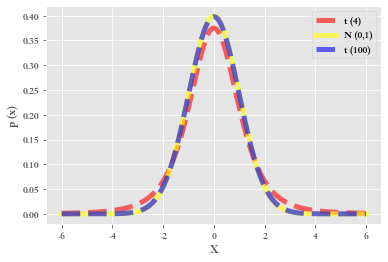

In [ ]:
# 使用scipy与matplotlib绘制不同的n下的t分布的密度函数
from scipy.stats import t
from scipy.stats import norm 
x = np.linspace(-6,6,10000)  
plt.plot(x, t.pdf(x,4),'--', lw=5, alpha=0.6, label='t (4)',c='red')
plt.plot(x, norm.pdf(x,loc=0,scale=1),'r-', lw=5, alpha=0.6, label='N (0,1)',c='yellow')
plt.plot(x, t.pdf(x,100),'--', lw=5, alpha=0.6, label='t (100)',c='blue')
plt.xlabel("X")
plt.ylabel("p (x)")
plt.legend()
plt.show()

可以看到：当自由度较大 $($ 如 $n \geqslant 30)$ 时, $t$ 分布可以用 $N(0,1)$ 分布近似（图中$t(100)$几乎与$N(0,1)$重合）。下面，我们使用样本均值和样本方差构造t统计量：

设 $x_{1}, x_{2}, \cdots, x_{n}$ 是来自正态分布 $N\left(\mu, \sigma^{2}\right)$ 的一个样本， $\bar{x}$ 与 $s^{2}$ 分别是该样本的样本均值与样本方差， 则有
$$
t=\frac{\sqrt{n}(\bar{x}-\mu)}{s} \sim t(n-1) 
$$

这个统计量的由来十分具有故事性：在1980年以前，统计学主要的工作时解决社会统计，如人口问题等，后来生物统计问题异军突起，这类问题的主要特点是：数据量一般较大，所用的方法大多数是以中心极限定理为依据的，因此由于中心极限定理总是会联系到正态分布，正态分布在那时候大行其道。皮尔逊认为：正态分布是上帝赐予人类唯一正确的分布类型。到了20世纪初期，越来越多农业、工业试验的统计数据，这些统计数据的特点是：数据量一般不大，没办法使用中心极限定理近似。1898年，酿酒化学技师戈塞特平时的工作接触的数据量很小，只有几个，他通过大量的实验数据发现：$t=\frac{\sqrt{n}(\bar{x}-\mu)}{s} \sim t(n-1)$ 的分布与标准正态分布$N(0,1)$并不一致，但是由于数学和统计学功底不够，并不能解决这个问题。于是，他到皮尔逊那里学习，着重研究少量数据的统计分析，在1908年终于以Student为笔名发表了有关论文，并提出：设 $x_{1}, x_{2}, \cdots, x_{n}$ 是来自正态分布 $N\left(\mu, \sigma^{2}\right)$ 的一个样本， $\bar{x}$ 与 $s^{2}$ 分别是该样本的样本均值与样本方差， 则有：$t=\frac{\sqrt{n}(\bar{x}-\mu)}{s} \sim t(n-1) $。

$t$ 分布的发现在统计学史上具有划时代的意义, 因为$t$分布的出现打破了正态分布一统天下的局面，$t$分布 开创了小样本统计推断的新纪元， 小样本统计分析由此引起了广大统计科研工作者的重视。事实上，戈塞特的证明存在着漏洞， 费希尔（Fisher）注意到这个问题并于 1922 年给出了此问题的完整证明。

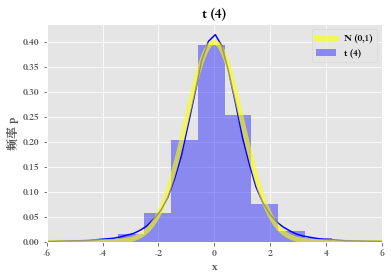

In [ ]:
from scipy.stats import norm 
from scipy.stats import t 
t_list = []
for i in range(300000):
    mu,sigma2 = 0,1
    x_i = norm.rvs(loc=mu, scale=sigma2, size=5)
    x_mean = np.mean(x_i)
    x_s = np.std(x_i,ddof=1)
    t_T = np.sqrt(4)*(x_mean-mu) / x_s
    t_list.append(t_T)
sns.distplot(t_list,color='blue',label='t (4)')
x = np.linspace(-6,6,10000)  
plt.plot(x, norm.pdf(x,loc=0,scale=1),'r-', lw=5, alpha=0.6, label='N (0,1)',c='yellow')
plt.xlabel("x")
plt.ylabel("频率 p")
plt.title("t (4)")
plt.xlim(-6,6)
plt.legend()
plt.show()

2.1 经验分布函数：

经验分布函数就是使用样本信息构造的分布函数近似未知的总体分布函数：

例子：随机观察总体X, 得到一个容量为 10 的样本:
$$
3.2, \quad 2.5, \quad-2, \quad 2.5, \quad 0,\quad 3,\quad 2 ,\quad 2.5, \quad 2, \quad 4
$$
求 $\mathrm{X}$ 经验分布函数。

解：首先，将样本排序 $-2<0<2=2<2.5=2.5=2.5<3<3.2<4$

于是，根据公式可以得到经验分布函数：
$$
F_{10}(x)=\left\{\begin{array}{cc}
0, & x<-2 \\
1 / 10, & -2 \leq x<0 \\
2 / 10, & 0 \leq x<2 \\
4 / 10, & 2 \leq x<2.5 \\
7 / 10, & 2.5 \leq x<3 \\
8 / 10, & 3 \leq x<3.2 \\
9 / 10, & 3.2 \leq x<4 \\
1, & x \ge 4
\end{array},\right.
$$



2.2 直方图

直方图是数值数据分布的精确图形表示， 这是一个连续变量（定量变量）的概率分布的估计。

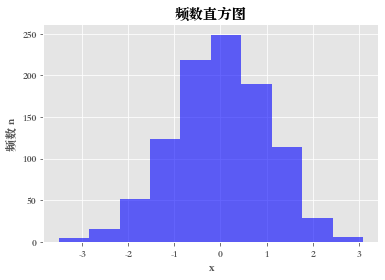

In [ ]:
# 频数直方图
x_samples = np.random.randn(1000)
plt.hist(x_samples, bins=10,color='blue',alpha=0.6)  # bins=10代表10根柱子
plt.xlabel("x")
plt.ylabel("频数 n")
plt.title("频数直方图")
plt.show()

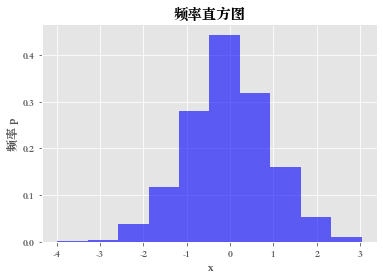

In [ ]:
# 频率直方图
x_samples = np.random.randn(1000)
plt.hist(x_samples, bins=10,color='blue',alpha=0.6,density=True)  # bins=10代表10根柱子
plt.xlabel("x")
plt.ylabel("频率 p")
plt.title("频率直方图")
plt.show()

1.1 基本概念

总体：研究对象的全体，它是一个随机变量，用$X$表示。

个体：组成总体的每个基本元素。

简单随机样本：来自总体$X$的$n$个相互独立且与总体同分布的随机变量$X_{1},X_{2}\cdots,X_{n}$，称为容量为$n$的简单随机样本，简称样本。

设总体 $X$ 具有分布函数 $F(x), x_{1}, x_{2}, \cdots, x_{n}$ 为取自该总体的容量为 $n$ 的样本，则样本联合分布函数为
$$
F\left(x_{1}, x_{2}, \cdots, x_{n}\right)=\prod_{i=1}^{n} F\left(x_{i}\right)
$$

统计量：设$X_{1},X_{2}\cdots,X_{n},$是来自总体$X$的一个样本，$g(X_{1},X_{2}\cdots,X_{n})$）是样本的连续函数，且$g()$中不含任何未知参数，则称$g(X_{1},X_{2}\cdots,X_{n})$为统计量。

样本均值：$\overline{X} = \frac{1}{n}\sum_{i = 1}^{n}X_{i}$

样本方差：$S^{2} = \frac{1}{n - 1}\sum_{i = 1}^{n}{(X_{i} - \overline{X})}^{2}$

样本矩：样本$k$阶原点矩：$A_{k} = \frac{1}{n}\sum_{i = 1}^{n}X_{i}^{k},k = 1,2,\cdots$

样本$k$阶中心矩：$B_{k} = \frac{1}{n}\sum_{i = 1}^{n}{(X_{i} - \overline{X})}^{k},k = 1,2,\cdots$

1.2 分布

$\chi^{2}$分布：$\chi^{2} = X_{1}^{2} + X_{2}^{2} + \cdots + X_{n}^{2}\sim\chi^{2}(n)$，其中$X_{1},X_{2}\cdots,X_{n},$相互独立，且同服从$N(0,1)$

$t$分布：$T = \frac{X}{\sqrt{Y/n}}\sim t(n)$ ，其中$X\sim N\left( 0,1 \right),Y\sim\chi^{2}(n),$且$X$，$Y$ 相互独立。

$F$分布：$F = \frac{X/n_{1}}{Y/n_{2}}\sim F(n_{1},n_{2})$，其中$X\sim\chi^{2}\left( n_{1} \right),Y\sim\chi^{2}(n_{2}),$且$X$，$Y$相互独立。

分位数：若$P(X \leq x_{\alpha}) = \alpha,$则称$x_{\alpha}$为$X$的$\alpha$分位数



1.3 正态总体的常用样本分布

(1) 设$X_{1},X_{2}\cdots,X_{n}$为来自正态总体$N(\mu,\sigma^{2})$的样本，

$\overline{X} = \frac{1}{n}\sum_{i = 1}^{n}X_{i},S^{2} = \frac{1}{n - 1}\sum_{i = 1}^{n}{{(X_{i} - \overline{X})}^{2},}$则：

1. $\overline{X}\sim N\left( \mu,\frac{\sigma^{2}}{n} \right){\ \ }$或者$\frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}}\sim N(0,1)$

2. $\frac{(n - 1)S^{2}}{\sigma^{2}} = \frac{1}{\sigma^{2}}\sum_{i = 1}^{n}{{(X_{i} - \overline{X})}^{2}\sim\chi^{2}(n - 1)}$

3. $\frac{1}{\sigma^{2}}\sum_{i = 1}^{n}{{(X_{i} - \mu)}^{2}\sim\chi^{2}(n)}$

4)${\ \ }\frac{\overline{X} - \mu}{S/\sqrt{n}}\sim t(n - 1)$



1.4 重要公式与结论

(1) 对于$\chi^{2}\sim\chi^{2}(n)$，有$E(\chi^{2}(n)) = n,D(\chi^{2}(n)) = 2n;$

(2) 对于$T\sim t(n)$，有$E(T) = 0,D(T) = \frac{n}{n - 2}(n > 2)$；

(3) 对于$F\tilde{\ }F(m,n)$，有 $\frac{1}{F}\sim F(n,m),F_{a/2}(m,n) = \frac{1}{F_{1 - a/2}(n,m)};$

(4) 对于任意总体$X$，有 $E(\overline{X}) = E(X),E(S^{2}) = D(X),D(\overline{X}) = \frac{D(X)}{n}$

